In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 16})

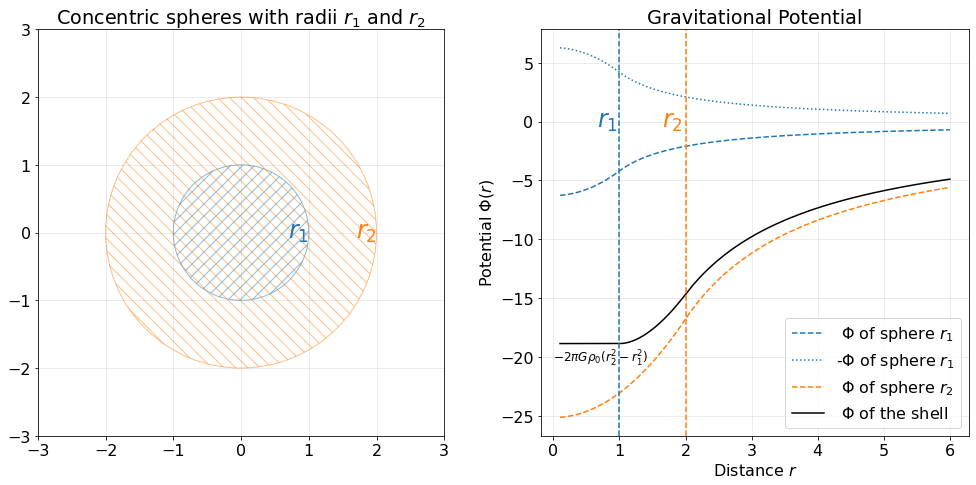

In [63]:
# Constants
G = 1  # Gravitational constant (set to 1 for simplicity)
rho_0 = 1  # Uniform density (set to 1 for simplicity)

# Radii of the two spheres
r_1 = 1  # Inner radius
r_2 = 2  # Outer radius (r_2 > r_1)

# Potential function for a homogeneous sphere
def sphere_potential(r, r_i, rho_0):
    if r < r_i:
        # Inside the sphere (0 < r < r_i)
        return -(2/3) * np.pi * G * rho_0 * (3 * r_i**2 - r**2)
    else:
        # Outside the sphere (r > r_i)
        return -(4/3) * np.pi * G * rho_0 * r_i**3 / r

# Potential function for the spherical shell
def shell_potential(r, r_1, r_2, rho_0):
    if r < r_1:
        # Inside the cavity (0 < r < r_1)
        return (2/3) * np.pi * G * rho_0 * (r**2 - 3 * r_2**2) - (2/3) * np.pi * G * rho_0 * (r**2 - 3 * r_1**2)
    elif r_1 <= r < r_2:
        # In the shell (r_1 < r < r_2)
        return (2/3) * np.pi * G * rho_0 * (r**2 - 3 * r_2**2) + (4/3) * np.pi * G * rho_0 * r_1**3 / r
    else:
        # Outside the shell (r > r_2)
        return -(4/3) * np.pi * G * rho_0 * r_2**3 / r + (4/3) * np.pi * G * rho_0 * r_1**3 / r

# Generate r values for plotting the potential
r_values = np.linspace(0.1, 3 * r_2, 1000)  # Start from a small value to avoid division by zero
phi_shell_values = [shell_potential(r, r_1, r_2, rho_0) for r in r_values]
phi_r1_values = [sphere_potential(r, r_1, rho_0) for r in r_values]
phi_minus_r1_values = [-p for p in phi_r1_values]  # Negative of the inner sphere's potential
phi_r2_values = [sphere_potential(r, r_2, rho_0) for r in r_values]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the spheres with dark grey hatching and different hatch patterns
circle1 = plt.Circle((0, 0), r_1, facecolor='none', hatch='//', edgecolor='tab:blue', alpha=0.5, linewidth=1)
circle2 = plt.Circle((0, 0), r_2, facecolor='none', hatch='\\\\', edgecolor='tab:orange', alpha=0.5, linewidth=1)

ax1.add_artist(circle1)
ax1.add_artist(circle2)

# Mark radii of the spheres
ax1.text(r_1, 0, r'$r_1$', fontsize=24, color='tab:blue', ha='right', va='center')
ax1.text(r_2, 0, r'$r_2$', fontsize=24, color='tab:orange', ha='right', va='center')

# Set limits and aspect ratio
ax1.set_xlim(-r_2*1.5, r_2*1.5)
ax1.set_ylim(-r_2*1.5, r_2*1.5)
ax1.set_aspect('equal')
ax1.set_title('Concentric spheres with radii $r_1$ and $r_2$')
ax1.grid()
# Make grid paler
ax1.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

# ----------------------------------------

# Plotting the potentials on the second subplot
ax2.plot(r_values, phi_r1_values, label=r' $\Phi$ of sphere $r_1$', color='tab:blue', linestyle='--')
ax2.plot(r_values, phi_minus_r1_values, label=r'-$\Phi$ of sphere $r_1$', color='tab:blue', linestyle=':')
ax2.plot(r_values, phi_r2_values, label=r' $\Phi$ of sphere $r_2$', color='tab:orange', linestyle='--')
ax2.plot(r_values, phi_shell_values, label=r' $\Phi$ of the shell', color='black')

# Add vertical lines at r_1 and r_2
ax2.axvline(r_1, color='tab:blue', linestyle='--')
ax2.axvline(r_2, color='tab:orange', linestyle='--')

# Mark radii of the spheres
ax2.text(0.98*r_1, 0, r'$r_1$', fontsize=24, color='tab:blue', ha='right', va='center')
ax2.text(0.98*r_2, 0, r'$r_2~$', fontsize=24, color='tab:orange', ha='right', va='center')

# Configure plot details
ax2.set_title('Gravitational Potential')
ax2.set_xlabel('Distance $r$')
ax2.set_ylabel('Potential $\Phi(r)$')
ax2.legend()
ax2.grid()
# Make grid paler
ax2.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

# Mark the constant potential inside the cavity
ax2.text(0, 1.02*(-2*np.pi*G*rho_0*(r_2**2 - r_1**2)), r'$-2 \pi G \rho_0 (r_2^2 - r_1^2)$', 
         fontsize=12, ha='left', va='top')

# Adjust layout and show the plots
plt.tight_layout()

# Save the figure
plt.savefig(f"../Figures/spherical_shell_potential.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()
